<a href="https://colab.research.google.com/github/Daniel-JFA/ArqSoftDJFA/blob/main/ClaseEsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Conexion a base de datos***


In [1]:
!pip install mysql-connector-python

import mysql.connector

# Crear una conexión a la base de datos MySQL
conn = mysql.connector.connect(
    host="bolruxyecypx1aopslow-mysql.services.clever-cloud.com",
    user="urc25cuuwg0uzsbh",
    password="d3UdGjs8QdZICM7NGruM",
    database="bolruxyecypx1aopslow"
)

# Crear un cursor
cursor = conn.cursor()

# Crear una tabla (si no existe)
cursor.execute('''
    CREATE TABLE IF NOT EXISTS users (
        id INT AUTO_INCREMENT PRIMARY KEY,
        name VARCHAR(255) NOT NULL,
        age INT NOT NULL
    )
''')

# Insertar datos en la tabla
cursor.execute('''
    INSERT INTO users (name, age) VALUES (%s, %s)
''', ('John Doe', 30))

# Insertar más datos
usuarios = [
    ('Jane Smith', 25),
    ('Alice Johnson', 22),
    ('Bob Brown', 28)
]

for usuario in usuarios:
    cursor.execute('''
        INSERT INTO users (name, age) VALUES (%s, %s)
    ''', usuario)

# Confirmar la transacción
conn.commit()

# Consultar datos
cursor.execute('SELECT * FROM users')
resultados = cursor.fetchall()

for fila in resultados:
    print(fila)

# Actualizar datos
cursor.execute('''
    UPDATE users
    SET age = %s
    WHERE name = %s
''', (35, 'John Doe'))

# Confirmar la transacción
conn.commit()

# Eliminar datos
cursor.execute('''
    DELETE FROM users
    WHERE name = %s
''', ('Alice Johnson',))

# Confirmar la transacción
conn.commit()

# Consultar datos después de la actualización y eliminación
cursor.execute('SELECT * FROM users')
resultados = cursor.fetchall()

for fila in resultados:
    print(fila)

# Cerrar la conexión
conn.close()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.2 MB/s eta 0:00:00
(1, 'John Doe', 30)
(2, 'Jane Smith', 25)
(3, 'Alice Johnson', 22)
(4, 'Bob Brown', 28)
(1, 'John Doe', 35)
(2, 'Jane Smith', 25)
(4, 'Bob Brown', 28)


# ***Traer Datos***


In [9]:
import mysql.connector
from datetime import datetime

# Crear una conexión a la base de datos MySQL
conn = mysql.connector.connect(
    host="bolruxyecypx1aopslow-mysql.services.clever-cloud.com",
    user="urc25cuuwg0uzsbh",
    password="d3UdGjs8QdZICM7NGruM",
    database="bolruxyecypx1aopslow"
)

# Crear un cursor
cursor = conn.cursor()

# Consultar todos los datos de la tabla 'sensores'
cursor.execute('SELECT * FROM sensores')

# Obtener todos los resultados
resultados = cursor.fetchall()

# Mostrar los resultados con la fecha formateada
for fila in resultados:
    id, sensor_id, value, another_value, fecha = fila
    fecha_formateada = fecha.strftime('%Y-%m-%d %H:%M:%S')
    print((id, sensor_id, value, another_value, fecha_formateada))

# Cerrar la conexión
conn.close()


(1, '49', '25', '89', '2024-06-07 21:58:02')
(2, '56', '29.4', '46', '2024-06-07 21:58:02')
(3, '59', '29.4', '52', '2024-06-07 21:58:02')
(4, '59', '29.4', '46', '2024-06-07 21:58:02')
(5, '60', '29.2', '46', '2024-06-07 21:58:02')
(6, '57', '29.2', '46', '2024-06-07 21:58:02')
(7, '57', '29.2', '46', '2024-06-07 21:58:02')
(8, '57', '29.2', '52', '2024-06-07 21:58:02')
(9, '57', '29.2', '46', '2024-06-07 21:58:02')
(10, '57', '29.2', '46', '2024-06-07 21:58:02')
(11, '57', '29.2', '46', '2024-06-07 21:58:02')
(12, '58', '29.1', '46', '2024-06-07 21:58:02')
(13, '57', '29.1', '46', '2024-06-07 21:58:02')
(14, '57', '29.1', '52', '2024-06-07 21:58:02')
(15, '57', '29.1', '46', '2024-06-07 21:58:02')
(16, '57', '29.2', '52', '2024-06-07 21:58:02')
(17, '57', '29.2', '46', '2024-06-07 21:58:02')
(18, '56', '29.2', '52', '2024-06-07 21:58:02')
(19, '57', '29.2', '53', '2024-06-07 21:58:02')
(20, '57', '29.2', '46', '2024-06-07 21:58:02')
(21, '57', '29.2', '46', '2024-06-07 21:58:02')
(22

# ***Test AQI***

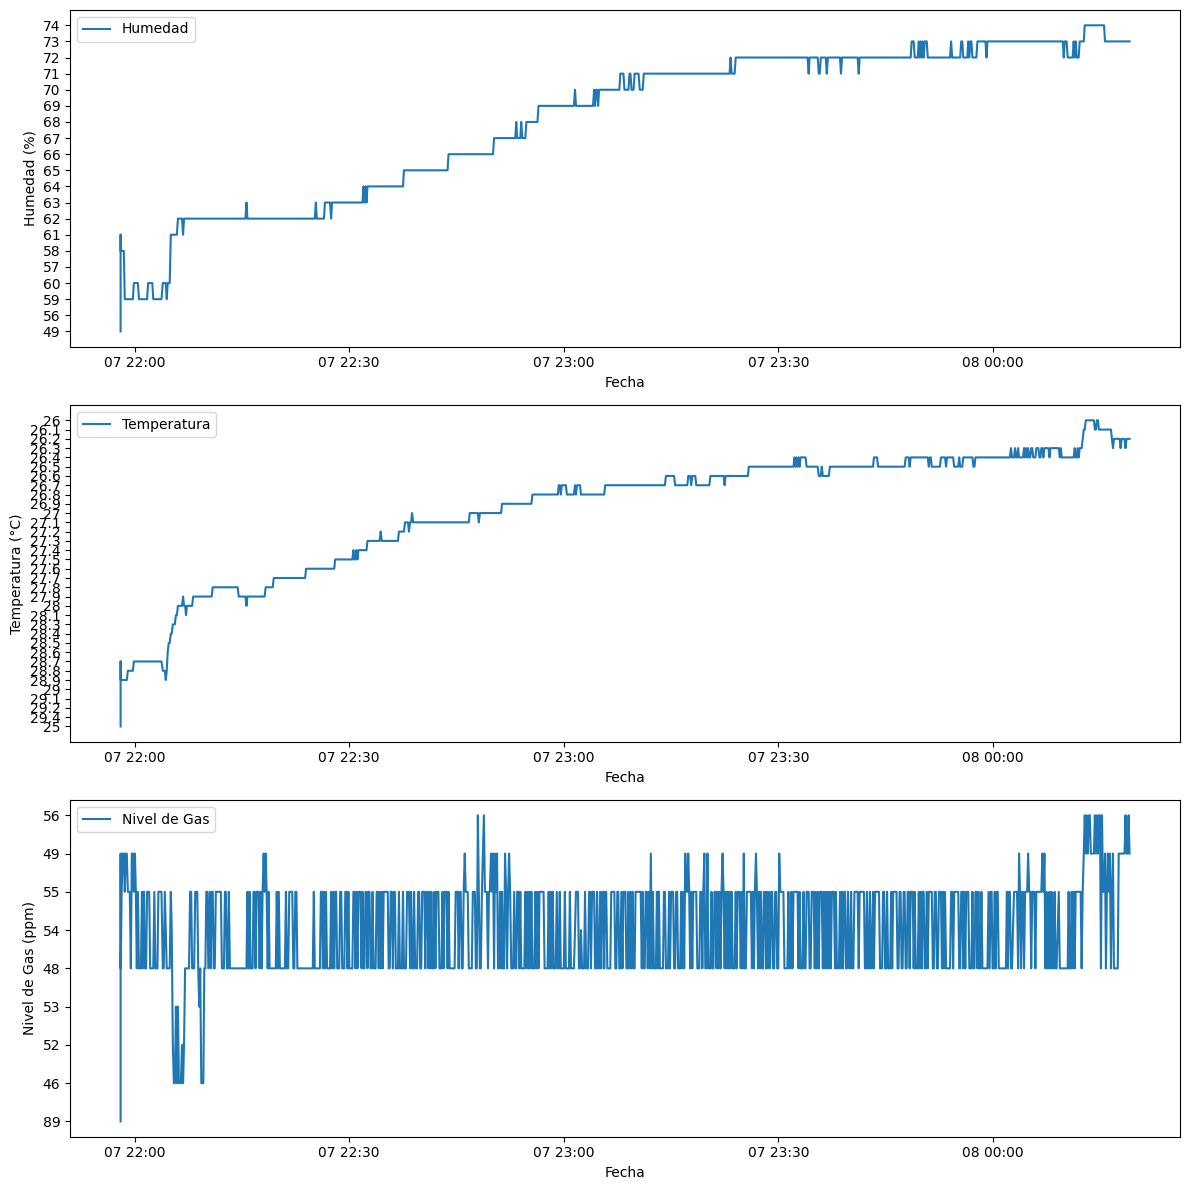

Mean Squared Error: 0.06018422852539262
    Actual  Predicted
0     26.4  26.342955
1     26.5  26.342955
2     26.3  26.263927
3     28.9  28.705613
4     28.9  28.834394
..     ...        ...
262   26.8  26.841243
263   27.5  27.924886
264   26.4  26.263927
265   26.7  26.596119
266   27.5  27.837818

[267 rows x 2 columns]


In [8]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Conectar a la base de datos MySQL
conn = mysql.connector.connect(
    host="bolruxyecypx1aopslow-mysql.services.clever-cloud.com",
    user="urc25cuuwg0uzsbh",
    password="d3UdGjs8QdZICM7NGruM",
    database="bolruxyecypx1aopslow"
)

# Crear un cursor
cursor = conn.cursor()

# Consultar todos los datos de la tabla 'sensores'
cursor.execute('SELECT * FROM sensores')
resultados = cursor.fetchall()

# Cerrar la conexión
conn.close()

# Convertir los resultados a un DataFrame de pandas
df = pd.DataFrame(resultados, columns=['id', 'humedad', 'temperatura', 'nivel_gas', 'fecha'])

# Convertir la columna 'fecha' a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Visualizar los datos
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(df['fecha'], df['humedad'], label='Humedad')
plt.xlabel('Fecha')
plt.ylabel('Humedad (%)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['fecha'], df['temperatura'], label='Temperatura')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['fecha'], df['nivel_gas'], label='Nivel de Gas')
plt.xlabel('Fecha')
plt.ylabel('Nivel de Gas (ppm)')
plt.legend()

plt.tight_layout()
plt.show()

# Preparar los datos para la predicción de la temperatura
X = df[['humedad', 'nivel_gas']]  # Características
y = df['temperatura']  # Etiqueta (temperatura)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir la temperatura
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Mostrar todas las predicciones
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions = predictions.reset_index(drop=True)
print(predictions)



